# Data Exploration Project: Predict Student Droput and Academic Success

In this project we aim to predict if an enrolled student will dropout out of university with the help of demographic data, social economic factors and information about the academic performance. The dataset used for this project is from kaggle (https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention).

## Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

## Data Clean Up

In the first section the dataset will be prepared so that a ML-model can be trainined. For this we will first analyse the dataset and then clean it.

### 1. Metadata
- Marital status:	The marital status of the student. (Categorical)
- Application mode:	The method of application used by the student. (Categorical)
- Application order:	The order in which the student applied. (Numerical)
- Course:	The course taken by the student. (Categorical
- Daytime/evening attendance:	Whether the student attends classes during the day or in the evening. (Categorical)
- Previous qualification:	The qualification obtained by the student before enrolling in higher education. (Categorical)
- Nacionality:	The nationality of the student. (Categorical)
- Mother's qualification:	The qualification of the student's mother. (Categorical)
- Father's qualification:	The qualification of the student's father. (Categorical)
- Mother's occupation:	The occupation of the student's mother. (Categorical)
- Father's occupation:	The occupation of the student's father. (Categorical)
- Displaced:	Whether the student is a displaced person. (Categorical)
- Educational: special needs	Whether the student has any special educational needs. (Categorical)
- Debtor:	Whether the student is a debtor. (Categorical)
- Tuitio fees up to date:	Whether the student's tuition fees are up to date. (Categorical
- Gender:	The gender of the student. (Categorical)
- Scholarship holder:	Whether the student is a scholarship holder. (Categorical)
- Age at enrollment:	The age of the student at the time of enrollment. (Numerical)
- International:	Whether the student is an international student. (Categorical)
- Curricular units 1st sem (credited):	The number of curricular units credited by the student in the first semester. (Numerical)
- Curricular units 1st sem (enrolled):	The number of curricular units enrolled by the student in the first semester. (Numerical)
- Curricular units 1st sem (evaluations):	The number of curricular units evaluated by the student in the first semester. (Numerical)
- Curricular units 1st sem (approved):	The number of curricular units approved by the student in the first semester. (Numerical)

### 2. Analysing the Data

In [15]:
df_dropouts = pd.read_csv("data/dataset_dropout.csv", sep=";")
df_dropouts.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [16]:
df_dropouts.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [17]:
df_dropouts.dropna(inplace=True)

In [18]:
df_dropouts.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

#### 2.1 Conversion of Categorical Values to Numerical

In [19]:
df_dropouts.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [20]:
df_dropouts['Target'].replace(['Dropout', 'Graduate', 'Enrolled'],
                              [0,1,2], inplace=True)

In [21]:
df_dropouts.Target.unique()

array([0, 1, 2])

#### 2.2 Correlation Analysis

First we will use the <b>  Pearsman correlation </b> method to check which columns show linear correlation to the target column "Target".

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/Users/Eleni/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


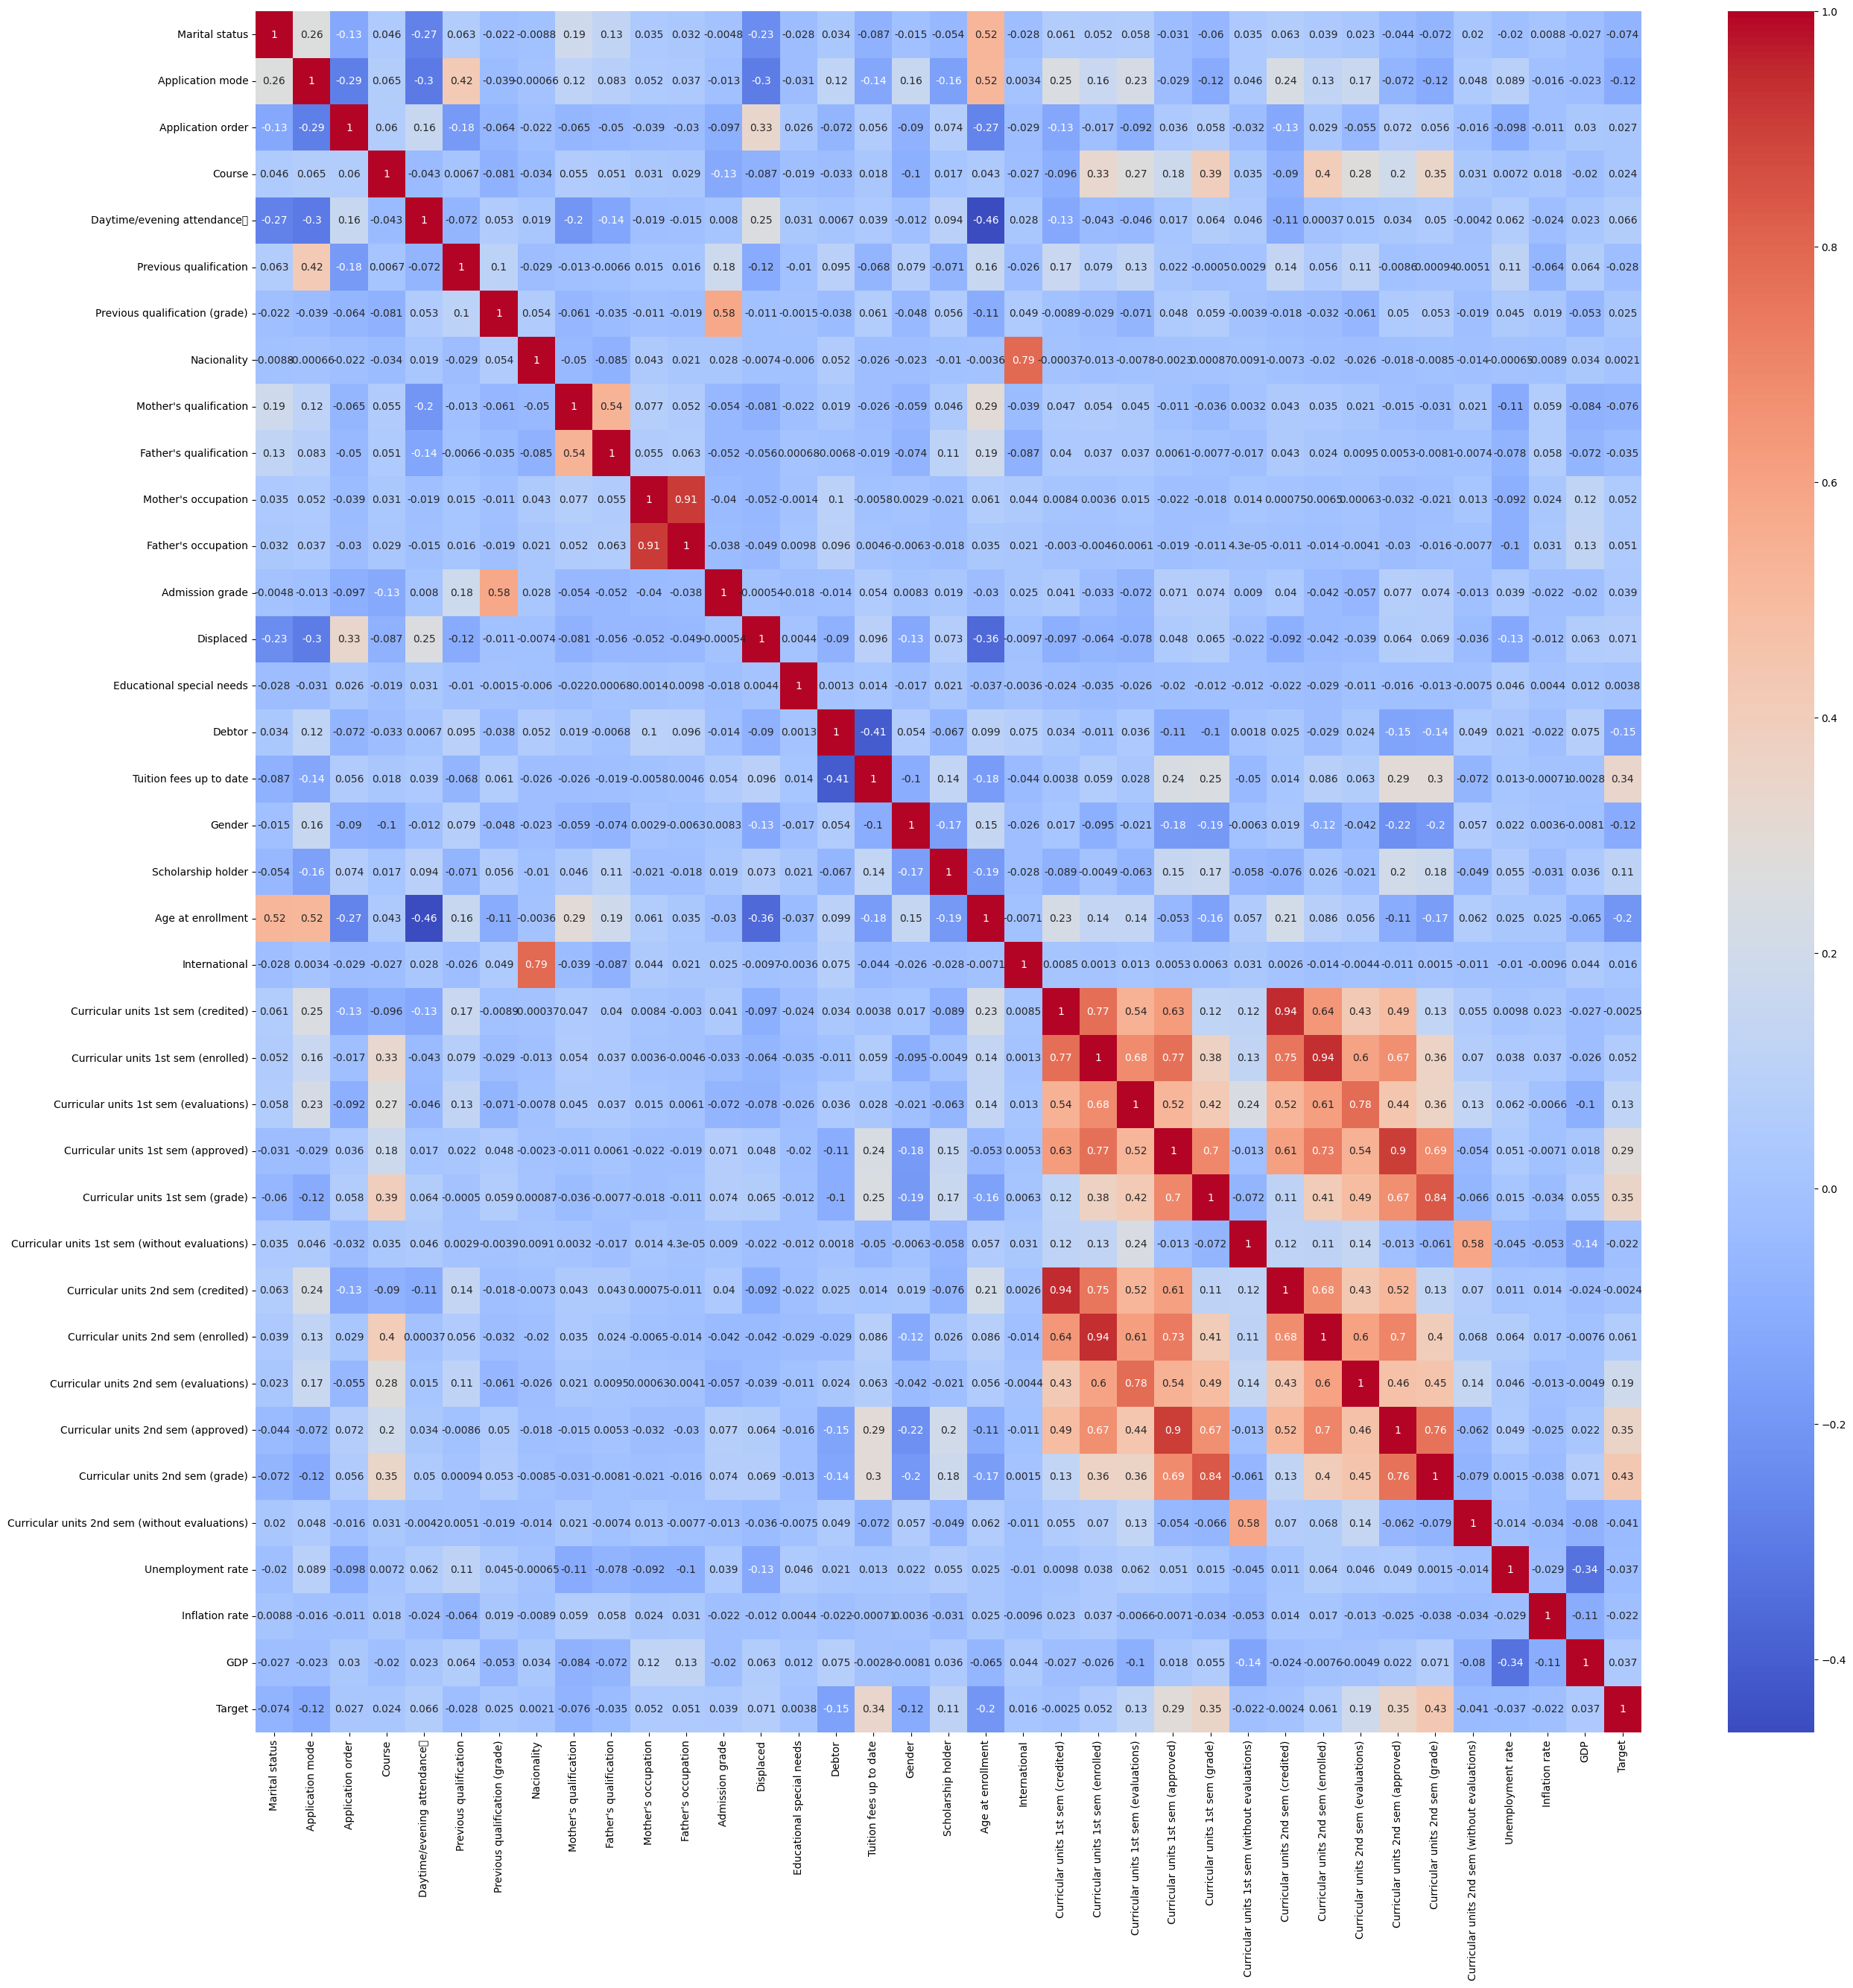

In [22]:
plt.figure(figsize=(30,30))
ax = sns.heatmap(df_dropouts.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [23]:
df_dropouts.Target.value_counts()

Target
1    2209
0    1421
2     794
Name: count, dtype: int64

However, the <b> Parson Correlation Method </b> does not see if two variables have a non linear dependence. Therefore, we will use the <b> Spearsman Correlation Method </b>.

We have decided to look at only the columns that have a correlation coefficient between 0.04 and 1 as well as -0.04 and -1 as these can indicate a meaningful relationship to the column "Target".

In [24]:
target = df_dropouts.Target.to_list()

for column_name in df_dropouts.columns:
    column = df_dropouts[column_name].to_list()
    corr, pval = spearmanr(column, target)
    if corr > 0.04 or corr < -0.04:
        print("Column name: ", column_name)
        print("Spearman's correlation coefficant: ", corr)
        print("p-value: ", pval)
        print()
    

Column name:  Marital status
Spearman's correlation coefficant:  -0.09727043556026728
p-value:  8.97295991662813e-11

Column name:  Application mode
Spearman's correlation coefficant:  -0.12330141206255787
p-value:  1.867907991115544e-16

Column name:  Application order
Spearman's correlation coefficant:  0.044461841106241
p-value:  0.0030971804685679676

Column name:  Daytime/evening attendance	
Spearman's correlation coefficant:  0.06929265825180365
p-value:  3.966761187187711e-06

Column name:  Previous qualification
Spearman's correlation coefficant:  -0.12275689533710299
p-value:  2.534282422328002e-16

Column name:  Mother's qualification
Spearman's correlation coefficant:  -0.05124343311836924
p-value:  0.0006504881845149075

Column name:  Admission grade
Spearman's correlation coefficant:  0.04852951297760049
p-value:  0.0012429282012133467

Column name:  Displaced
Spearman's correlation coefficant:  0.07639463645839115
p-value:  3.6329699333545456e-07

Column name:  Debtor
Spe

The columns that do not have a high correlation to the target column are now dropped from the dataset and a new "cleaned" dataset is created.

In [25]:
not_considered_columns = []

for column_name in df_dropouts.columns:
    column = df_dropouts[column_name].to_list()
    corr, pval = spearmanr(column, target)
    if corr <= 0.04 and corr >=-0.04:
        print("Column name: ", column_name)
        not_considered_columns.append(column_name)
        

Column name:  Course
Column name:  Previous qualification (grade)
Column name:  Nacionality
Column name:  Father's qualification
Column name:  Mother's occupation
Column name:  Father's occupation
Column name:  Educational special needs
Column name:  International
Column name:  Curricular units 1st sem (credited)
Column name:  Curricular units 1st sem (without evaluations)
Column name:  Curricular units 2nd sem (credited)
Column name:  Curricular units 2nd sem (without evaluations)
Column name:  Unemployment rate
Column name:  Inflation rate


In [26]:
df_dropouts_clean = df_dropouts.drop(not_considered_columns, axis=1)
df_dropouts_clean.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
0,1,17,5,1,1,19,127.3,1,0,1,...,0,0,0,0.000000,0,0,0,0.000000,1.74,0
1,1,15,1,1,1,1,142.5,1,0,0,...,6,6,6,14.000000,6,6,6,13.666667,0.79,1
2,1,1,5,1,1,37,124.8,1,0,0,...,6,0,0,0.000000,6,0,0,0.000000,1.74,0
3,1,17,2,1,1,38,119.6,1,0,1,...,6,8,6,13.428571,6,10,5,12.400000,-3.12,1
4,2,39,1,0,1,37,141.5,0,0,1,...,6,9,5,12.333333,6,6,6,13.000000,0.79,1


## Training of an ML-Model

In this section an ML-model will be trained in order to be able to predict student droput or academic success.

### 1. Lineare Regression

### 2. Ridge Regression

### 3. KNN

### 4. Random forest